In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nexusplt as nxp
from ugvc.reports.report_utils import ShortReportUtils, parse_config
from ugvc.reports.report_data_loader import ReportDataLoader
from IPython.display import display, Markdown

pd.options.display.float_format = '{:,.2%}'.format
pd.set_option('display.max_colwidth', None)

In [2]:
parameters, param_names = parse_config('var_report.config')

# globals
image_dir = 'plots'
image_prefix = parameters['image_prefix']
reference_version = parameters['reference_version']
h5outfile = parameters['h5outfile']
trained_w_gt = parameters['trained_w_gt']
verbosity = parameters['verbosity']
pipeline_version = parameters['pipeline_version']

report_utils = ShortReportUtils(image_dir, image_prefix, verbosity, h5outfile)

if verbosity > 1:
    display(Markdown(f"# Variant Calling report v{pipeline_version} (INTERNAL usage)"))
else:
    display(Markdown(f"# Variant Calling report v{pipeline_version}"))

# Variant Calling report v2.4.1 (INTERNAL usage)

## 1. Input Parameters

In [3]:
# load data
data_loader = ReportDataLoader(concordance_file=parameters['h5_concordance_file'],
                               reference_version=reference_version)
data = {
    'Trained wo gt': data_loader.load_concordance_df(),
    'whole genome': data_loader.load_whole_genome_concordance_df()
}

source_keys = list(data_loader.sources)

In [4]:
if 'well_mapped_coverage' in data['whole genome'].columns:
    parameters['mean_var_depth'] = '{:.2f}'.format(data['whole genome']['well_mapped_coverage'].mean())
    param_names.append('mean_var_depth')

try:
    args = pd.read_hdf(data_loader.sources['Trained wo gt'][0], 'input_args', mode='r')
    parameters['truth_sample_name'] = args['truth_sample_name'][0]
except:
    pass

parameters_df = pd.DataFrame.from_dict(parameters, orient='index', columns=['value']).reindex(param_names)
parameters_df.to_hdf(h5outfile, key="parameters")
display(parameters_df)

/home/doron/miniconda3/envs/genomics.py3/lib/python3.7/site-packages/pandas/core/generic.py:2718: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['value'], dtype='object')]

  encoding=encoding,


,value
run_id,140479-BC21
pipeline_version,2.4.1
h5_concordance_file,./test.untrained.h5
verbosity,5
truth_sample_name,NA
model_name_with_gt,untrained_ignore_gt_excl_hpol_runs
model_name_without_gt,threshold_model_recall_precision_ignore_gt_excl_hpol_runs
model_pkl_with_gt,dummy1.pkl
model_pkl_without_gt,dummy2.pkl
mean_var_depth,64.80


## 2. Performance over all Data
The concordance between the variant calling results and the ground truth sample is presented below.
* Red line - precision and recall over different tree-scores.
* Red dot - precision and recall values for the chosen threshold.
* Black dot -precision and recall after filtering systematic errors (SEC)

added plot to column 0 of row 0 for source whole genome
added plot to column 1 of row 0 for source whole genome
added plot to column 2 of row 0 for source whole genome
added plot to column 3 of row 0 for source whole genome
added plot to column 4 of row 0 for source whole genome


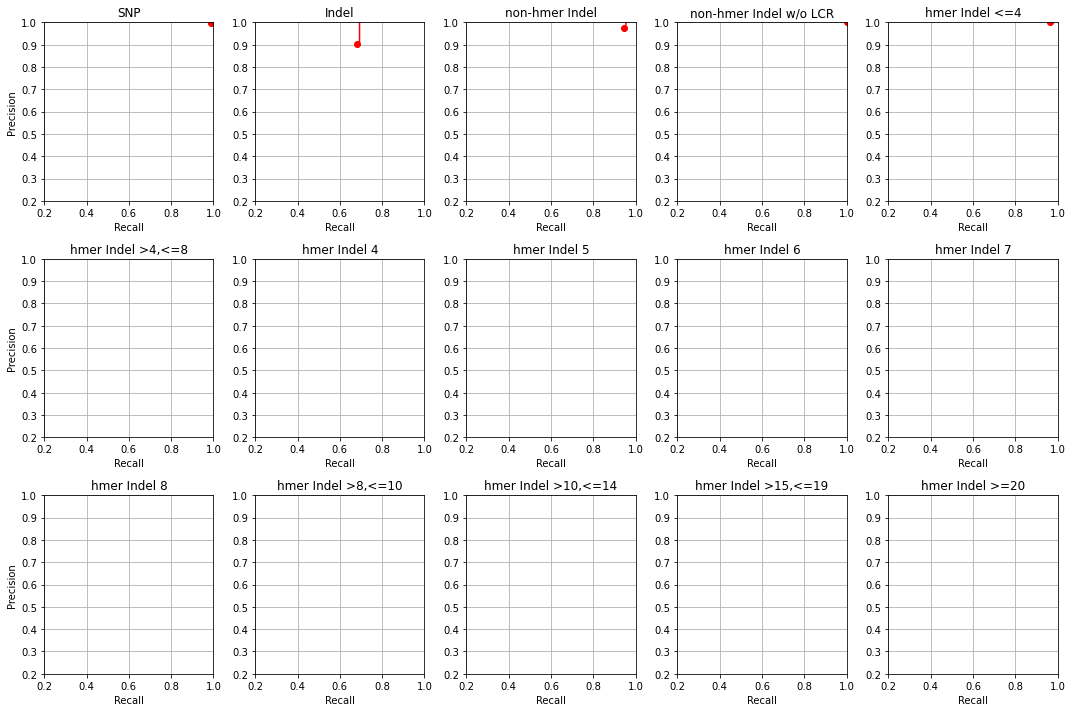

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP,1728,16,15,99.31%,99.07%,99.65%,99.36%
Indel,219,48,66,73.52%,68.04%,90.30%,77.60%
non-hmer Indel,89,6,4,96.63%,94.38%,97.67%,96.00%
non-hmer Indel w/o LCR,63,4,0,100.00%,100.00%,100.00%,100.00%
hmer Indel <=4,27,23,0,100.00%,96.30%,100.00%,98.11%
"hmer Indel >4,<=8",17,5,0,100.00%,100.00%,94.44%,97.14%
hmer Indel 4,4,2,0,100.00%,100.00%,100.00%,100.00%
hmer Indel 5,6,2,0,100.00%,100.00%,85.71%,92.31%
hmer Indel 6,3,2,0,100.00%,100.00%,100.00%,100.00%
hmer Indel 7,2,1,0,100.00%,100.00%,100.00%,100.00%


In [5]:
pd.options.display.float_format = '{:,.2%}'.format
if verbosity > 1:
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8',
              'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8',
              'hmer Indel >8,<=10', 'hmer Indel >10,<=14', 'hmer Indel >15,<=19', 'hmer Indel >=20']
else:
    categories = ['SNP', 'Indel']

report_utils.basic_analysis(data, categories, 'all_data', 'sec_data')

In [6]:
data['Trained wo gt'][['ref', 'alleles', 'gt_ultima', 'gt_ground_truth']]

,ref,alleles,gt_ultima,gt_ground_truth
"(chr9, 111372744)",T,"(T, C)","(0, 1)","(0, 1)"
"(chr9, 3081791)",T,"(T, C)","(1, 1)","(1, 1)"
"(chr9, 9704089)",C,"(C, CA)","(0, 1)","(0, 1)"
"(chr9, 107284851)",G,"(G, C)","(1, 1)","(1, 1)"
"(chr9, 116624510)",G,"(G, C)","(0, 1)","(0, 1)"
...,...,...,...,...
"(chr9, 99295161)",A,"(A, G)","(1, 1)","(1, 1)"
"(chr9, 1754723)",A,"(A, G)","(1, 1)","(1, 1)"
"(chr9, 93269628)",G,"(G, A)","(1, 1)","(1, 1)"
"(chr9, 69650451)",C,"(C, T)","(1, 1)","(1, 1)"


## 2.1 Stratified by base

#### (A,T)

added plot to column 0 of row 0 for source whole genome
added plot to column 1 of row 0 for source whole genome


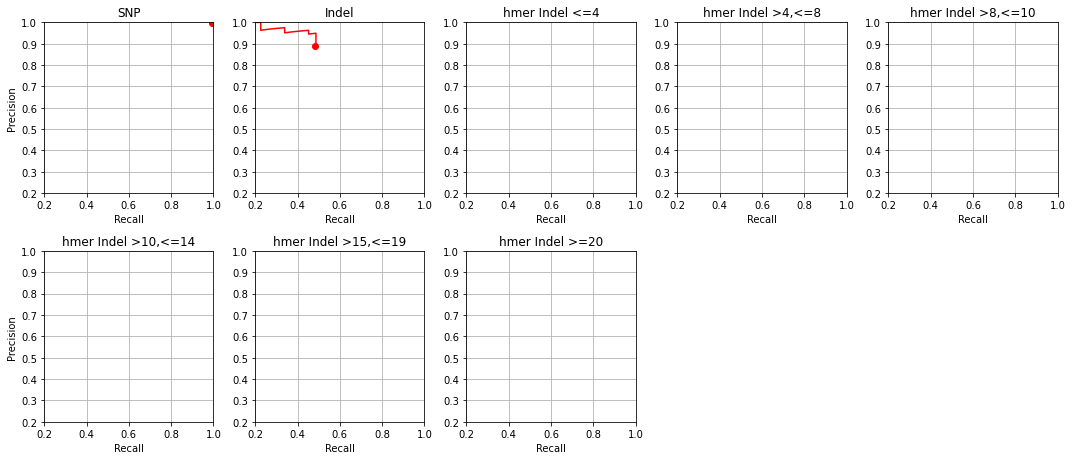

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP (A/T),857,11,7,99.42%,99.18%,99.65%,99.42%
Indel (A/T),116,10,59,53.45%,48.28%,88.89%,62.57%
hmer Indel <=4 (A/T),19,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >4,<=8 (A/T)",15,3,0,100.00%,100.00%,93.75%,96.77%
"hmer Indel >8,<=10 (A/T)",13,2,1,100.00%,84.62%,84.62%,84.62%
"hmer Indel >10,<=14 (A/T)",38,4,27,39.47%,28.95%,73.33%,41.51%
"hmer Indel >15,<=19 (A/T)",27,1,27,0.00%,0.00%,NaN,NaN
hmer Indel >=20 (A/T),4,0,4,0.00%,0.00%,NaN,NaN


In [7]:
if verbosity > 1:
    display(Markdown(f"## 2.1 Stratified by base"))
    display(Markdown(f"#### (A,T)"))
    categories = ['SNP', 'Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10',
                  'hmer Indel >10,<=14', 'hmer Indel >15,<=19', 'hmer Indel >=20']
    at_df = report_utils.base_stratification_analysis(data, categories, ('A', 'T'))

#### (G,C)

added plot to column 0 of row 0 for source whole genome


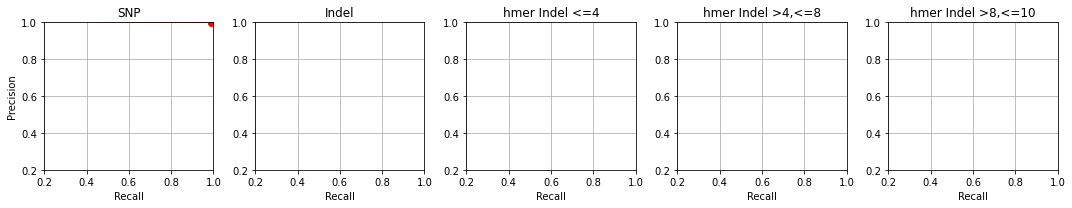

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP (G/C),871,5,8,99.20%,98.97%,99.65%,99.31%
Indel (G/C),12,25,1,91.67%,75.00%,100.00%,85.71%
hmer Indel <=4 (G/C),8,23,0,100.00%,87.50%,100.00%,93.33%
"hmer Indel >4,<=8 (G/C)",2,2,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >8,<=10 (G/C)",1,0,0,100.00%,0.00%,NaN,NaN


In [8]:
if verbosity > 1:
    display(Markdown(f"#### (G,C)"))
    categories = ['SNP', 'Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10']
    gc_df = report_utils.base_stratification_analysis(data, categories,('G', 'C'))   

In [9]:
if verbosity > 1:
    display(Markdown(f"### 2.2 Homozygous genotyping accuracy"))
    display(Markdown(f"The precision and recall of called homozygous variants (where the variant was not classified as False Negative)"))
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 
                  'hmer Indel >8,<=10', 'hmer Indel >10,<=14', 'hmer Indel >15,<=19', 'hmer Indel >=20']
    df = report_utils.homozygous_genotyping_analysis(data, categories, "wg_homozygous")

### 2.2 Homozygous genotyping accuracy

The precision and recall of called homozygous variants (where the variant was not classified as False Negative)

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP,764,1,1,100.00%,99.87%,99.87%,99.87%
Indel,60,0,0,100.00%,100.00%,100.00%,100.00%
non-hmer Indel,33,0,0,100.00%,100.00%,100.00%,100.00%
hmer Indel <=4,10,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >4,<=8",9,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >8,<=10",4,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >10,<=14",4,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >15,<=19",0,0,0,NaN,NaN,NaN,NaN
hmer Indel >=20,0,0,0,NaN,NaN,NaN,NaN


## 3. Performance over UG high confidence regions

Variant calling peformance exclusing genomic areas where UG performance is poor, i.e:
- Homopolymers - runs of length 11 bp and above, padded with four bases around the genomic coordinates,
- AT-rich regions - bases where the GC content of the surrounding 40 bases is lower than 5%,
- Tandem repeats,
- Low mapping quality - regions that are covered by at least 20 reads, but less than 10% of these reads are aligned with mapping quality > 20,
- High coverage variability - regions with coverage that is highly variable between samples (std/mean > 0.5)

added plot to column 0 of row 0 for source whole genome
added plot to column 1 of row 0 for source whole genome
added plot to column 2 of row 0 for source whole genome
added plot to column 3 of row 0 for source whole genome
added plot to column 4 of row 0 for source whole genome


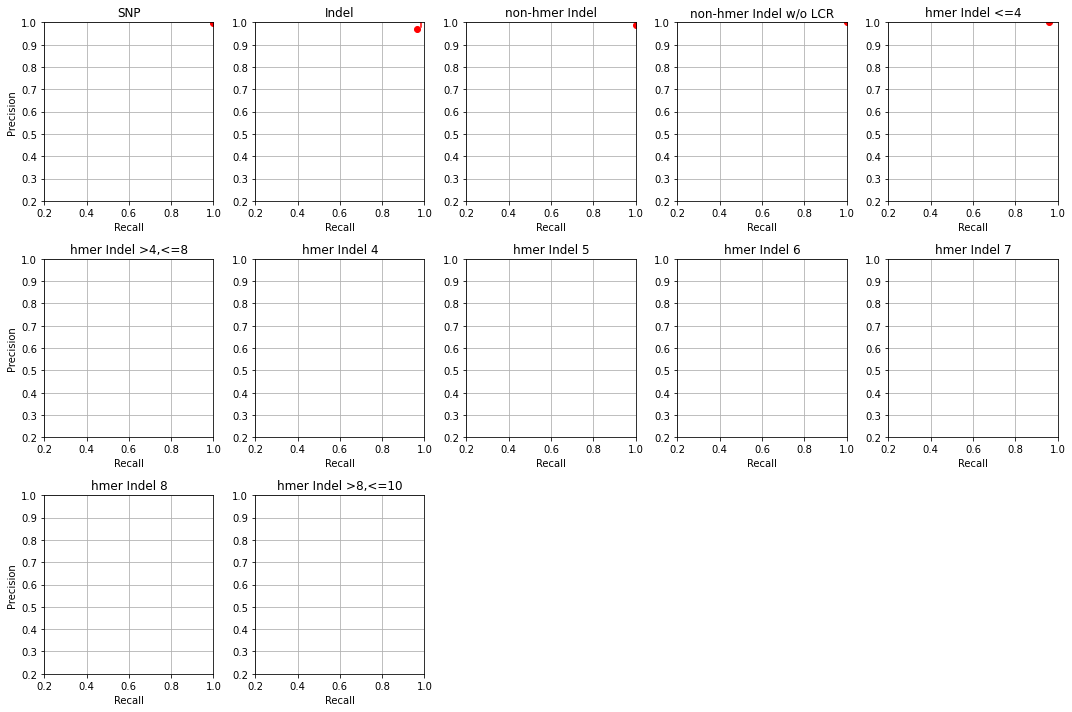

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP,1698,12,6,99.76%,99.59%,99.88%,99.73%
Indel,134,33,2,100.00%,96.27%,96.99%,96.63%
non-hmer Indel,76,4,0,100.00%,100.00%,98.70%,99.35%
non-hmer Indel w/o LCR,60,3,0,100.00%,100.00%,100.00%,100.00%
hmer Indel <=4,26,22,0,100.00%,96.15%,100.00%,98.04%
"hmer Indel >4,<=8",17,5,0,100.00%,100.00%,94.44%,97.14%
hmer Indel 4,4,2,0,100.00%,100.00%,100.00%,100.00%
hmer Indel 5,6,2,0,100.00%,100.00%,85.71%,92.31%
hmer Indel 6,3,2,0,100.00%,100.00%,100.00%,100.00%
hmer Indel 7,2,1,0,100.00%,100.00%,100.00%,100.00%


In [10]:
pd.options.display.float_format = '{:,.2%}'.format
ug_hcr_data = {'whole genome': data['whole genome'].query("ug_hcr==True").copy()}

if verbosity > 1:
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8',
              'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel >8,<=10']
else:
    categories = ['SNP', 'Indel']
    
report_utils.basic_analysis(ug_hcr_data, categories, 'ug_hcr', 'ug_hcr_sec_data')

In [11]:
if verbosity > 1:
    display(Markdown(f"### 3.1 Homozygous genotyping accuracy"))
    display(Markdown(f"The precision and recall of called homozygous variants (where the variant was not classified as False Negative)"))
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10']
    df = report_utils.homozygous_genotyping_analysis(ug_hcr_data, categories, "ug_hcr_homozygous")

### 3.1 Homozygous genotyping accuracy

The precision and recall of called homozygous variants (where the variant was not classified as False Negative)

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP,750,1,1,100.00%,99.87%,99.87%,99.87%
Indel,55,0,0,100.00%,100.00%,100.00%,100.00%
non-hmer Indel,32,0,0,100.00%,100.00%,100.00%,100.00%
hmer Indel <=4,10,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >4,<=8",9,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >8,<=10",4,0,0,100.00%,100.00%,100.00%,100.00%


## 4. Performance over regions with coverage>=20 and excluding areas with mappability

added plot to column 0 of row 0 for source whole genome
added plot to column 1 of row 0 for source whole genome
added plot to column 2 of row 0 for source whole genome
added plot to column 3 of row 0 for source whole genome
added plot to column 4 of row 0 for source whole genome


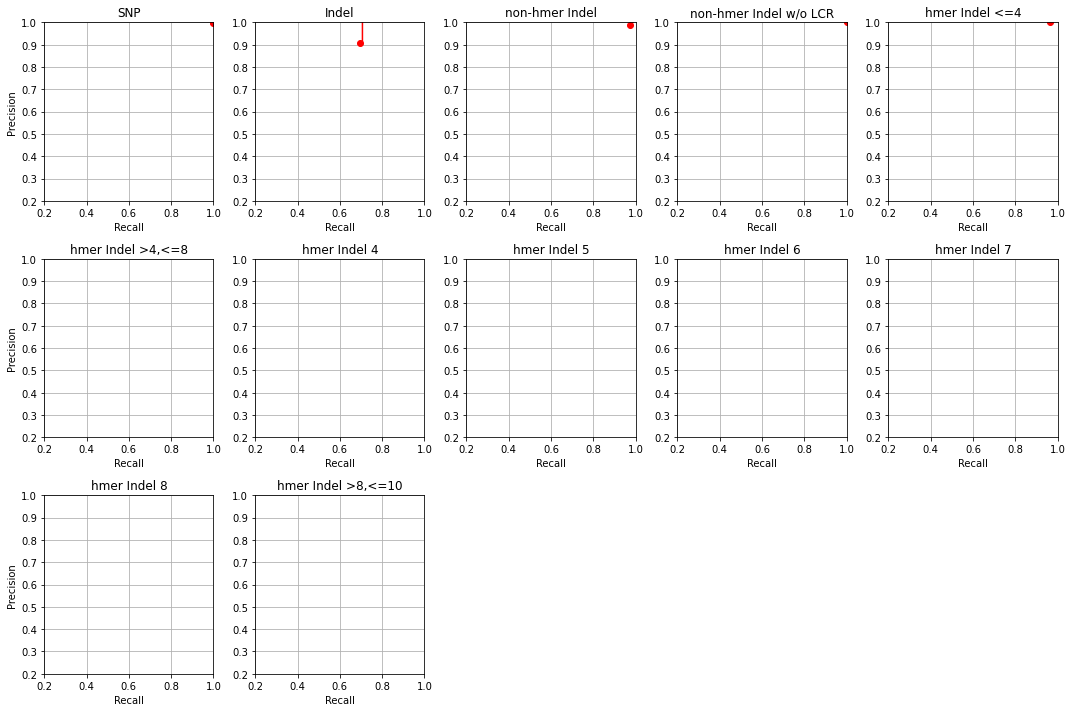

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP,1687,12,5,99.76%,99.64%,99.82%,99.73%
Indel,212,46,61,74.53%,69.34%,90.74%,78.61%
non-hmer Indel,84,4,1,98.81%,97.62%,98.80%,98.20%
non-hmer Indel w/o LCR,62,3,0,100.00%,100.00%,100.00%,100.00%
hmer Indel <=4,27,23,0,100.00%,96.30%,100.00%,98.11%
"hmer Indel >4,<=8",17,5,0,100.00%,100.00%,94.44%,97.14%
hmer Indel 4,4,2,0,100.00%,100.00%,100.00%,100.00%
hmer Indel 5,6,2,0,100.00%,100.00%,85.71%,92.31%
hmer Indel 6,3,2,0,100.00%,100.00%,100.00%,100.00%
hmer Indel 7,2,1,0,100.00%,100.00%,100.00%,100.00%


### 4.1 Homozygous genotyping accuracy

The precision and recall of called homozygous variants (where the variant was not classfied as False Negative)

,# pos,# neg,# init fn,max recall,recall,precision,F1
SNP,750,0,0,100.00%,100.00%,100.00%,100.00%
Indel,59,0,0,100.00%,100.00%,100.00%,100.00%
non-hmer Indel,32,0,0,100.00%,100.00%,100.00%,100.00%
non-hmer Indel w/o LCR,26,0,0,100.00%,100.00%,100.00%,100.00%
hmer Indel <=4,10,0,0,100.00%,100.00%,100.00%,100.00%
"hmer Indel >4,<=8",9,0,0,100.00%,100.00%,100.00%,100.00%


In [12]:
s = 'whole genome'
d = data[s]
if 'well_mapped_coverage' in d.columns and verbosity > 1:
    display(Markdown(f"## 4. Performance over regions with coverage>=20 and excluding areas with mappability"))    
    good_cov_data = {s: d[(d['well_mapped_coverage'] >= 20) & (d['mappability.0'])].copy()}
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8',
                  'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel >8,<=10']
    df = report_utils.basic_analysis(good_cov_data, categories, 'good_cvg_data')
    
    display(Markdown(f"### 4.1 Homozygous genotyping accuracy"))
    display(Markdown(f"The precision and recall of called homozygous variants (where the variant was not classfied as False Negative)"))
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8']
    report_utils.homozygous_genotyping_analysis(good_cov_data, categories, "good_cvg_data_homozygous")


##  5. Trained with and without Ground Truth
<ul>
<li><b>Trained wo gt - Trained without ground truth </b></li>
Random forest model trained on chromosome 9 using known variants in dbSNP and on common fp variants
<li><b>Trained with gt - Trained with ground truth</b></li>
Simple threshold model trained on chromosome 9 using its own ground truth
</ul>


added plot to column 0 of row 0 for source Trained wo gt
added plot to column 0 of row 0 for source Trained with gt
added plot to column 1 of row 0 for source Trained wo gt
added plot to column 1 of row 0 for source Trained with gt
added plot to column 2 of row 0 for source Trained wo gt
added plot to column 2 of row 0 for source Trained with gt
added plot to column 3 of row 0 for source Trained wo gt
added plot to column 3 of row 0 for source Trained with gt
added plot to column 4 of row 0 for source Trained wo gt
added plot to column 4 of row 0 for source Trained with gt
added plot to column 0 of row 1 for source Trained wo gt
added plot to column 0 of row 1 for source Trained with gt
added plot to column 1 of row 1 for source Trained with gt
added plot to column 4 of row 1 for source Trained with gt
added plot to column 0 of row 2 for source Trained with gt
added plot to column 1 of row 2 for source Trained wo gt
added plot to column 1 of row 2 for source Trained with gt


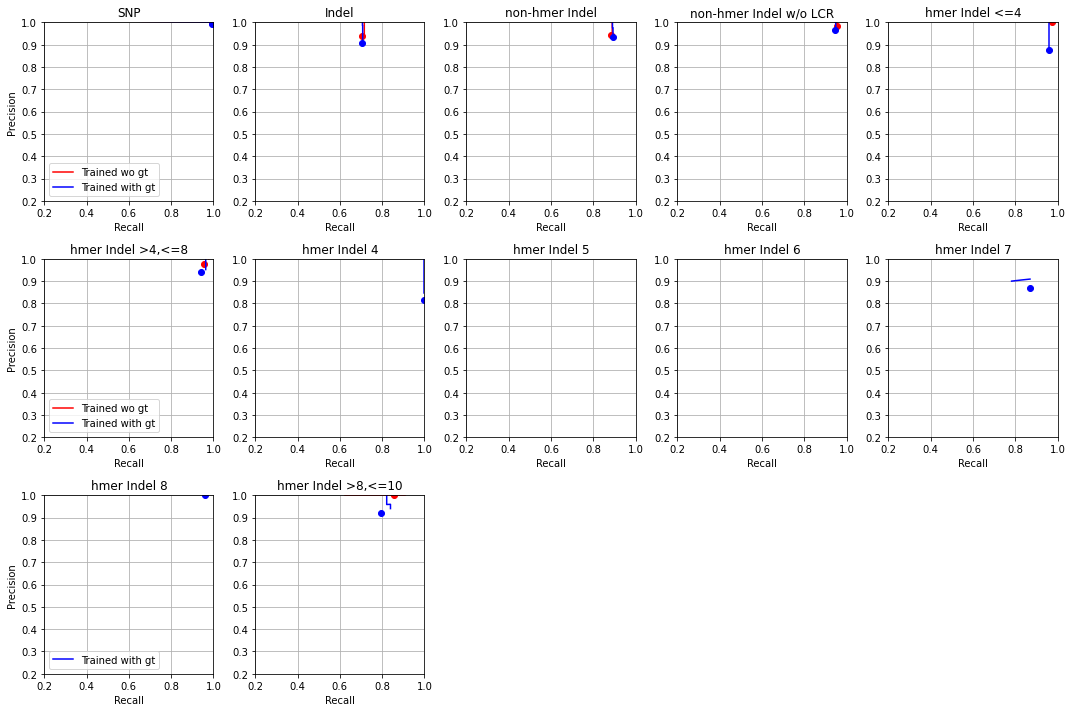

Trained wo gt                                     \
                               # pos # neg # init fn max recall  recall   
SNP                             4311    35        21     99.61%  99.49%   
Indel                            553   117       155     74.14%  70.52%   
non-hmer Indel                   255    36        28     91.76%  88.63%   
non-hmer Indel w/o LCR           174    21         8     95.98%  95.40%   
hmer Indel <=4                    70    57         0    100.00%  97.14%   
hmer Indel >4,<=8                 46    10         1     97.83%  95.65%   
hmer Indel 4                       6     9         0    100.00% 100.00%   
hmer Indel 5                      11     4         0    100.00% 100.00%   
hmer Indel 6                      13     3         0    100.00%  92.31%   
hmer Indel 7                      11     3         1     90.91%  90.91%   
hmer Indel 8                      11     0         0    100.00% 100.00%   
hmer Indel >8,<=10                35     0         2     94.29%  85.71%   

                                         Trained with gt                  \
                       precision      F1           # pos # neg # init fn   
SNP                       99.51%  99.50%            6840    66        44   
Indel                     93.98%  80.58%             920   198       267   
non-hmer Indel            94.56%  91.50%             405    48        43   
non-hmer Indel w/o LCR    98.22%  96.79%             314    30        16   
hmer Indel <=4           100.00%  98.55%             126   107         5   
hmer Indel >4,<=8         97.78%  96.70%              84    17         3   
hmer Indel 4             100.00% 100.00%              22    19         0   
hmer Indel 5              91.67%  95.65%              18     7         0   
hmer Indel 6             100.00%  96.00%              18     3         0   
hmer Indel 7             100.00%  95.24%              23     4         3   
hmer Indel 8             100.00% 100.00%              25     3         0   
hmer Indel >8,<=10       100.00%  92.31%              59     9         9   

                                                            
                       max recall  recall precision     F1  
SNP                        99.40%  99.23%    99.44% 99.33%  
Indel                      73.26%  70.33%    90.87% 79.29%  
non-hmer Indel             91.36%  89.14%    93.52% 91.28%  
non-hmer Indel w/o LCR     96.18%  94.59%    96.74% 95.65%  
hmer Indel <=4             96.83%  96.03%    87.68% 91.67%  
hmer Indel >4,<=8         100.00%  94.05%    94.05% 94.05%  
hmer Indel 4              100.00% 100.00%    81.48% 89.80%  
hmer Indel 5              100.00% 100.00%    94.74% 97.30%  
hmer Indel 6              100.00%  94.44%    94.44% 94.44%  
hmer Indel 7              100.00%  86.96%    86.96% 86.96%  
hmer Indel 8              100.00%  96.00%   100.00% 97.96%  
hmer Indel >8,<=10         91.53%  79.66%    92.16% 85.45%

In [13]:
# A block comparing model with and without ground truth . Only shown if h5_model_file is provided in the config file
if trained_w_gt is not None and verbosity > 1:
    display(Markdown("""
##  5. Trained with and without Ground Truth
<ul>
<li><b>Trained wo gt - Trained without ground truth </b></li>
Random forest model trained on chromosome 9 using known variants in dbSNP and on common fp variants
<li><b>Trained with gt - Trained with ground truth</b></li>
Simple threshold model trained on chromosome 9 using its own ground truth
</ul>
"""))
    pd.options.display.float_format = '{:,.2%}'.format
    data['Trained with gt'] = data_loader.load_trained_without_gt_concordance_df(trained_w_gt)
    sources = ['Trained wo gt', 'Trained with gt']
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8',
                  'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel >8,<=10']
    opt_tab, opt_res, perf_curve = report_utils.get_performance(data, categories, sources)
    report_utils.plot_performance(perf_curve, opt_res, categories, img='all.primary', source_keys=sources, legend=True)

    pd.options.display.float_format = '{:,.2%}'.format
    df = pd.concat([opt_tab[s] for s in sources], axis=1, keys=list(sources))
    df.to_hdf(h5outfile, key="trained_w_wo_gt")
    display(df)
    if 'well_mapped_coverage' in data['whole genome'].columns:
        filtData = {}
        for s in ['Trained wo gt', 'Trained with gt']:
            d = data['Trained with gt']
            filtData[s] = d[(d['well_mapped_coverage'] >= 20) & (d['mappability.0'])]

        categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8',
                      'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel >8,<=10']
        optTab, opt_res, perf_curve = report_utils.get_performance(filtData, categories, ['Trained with gt', 'Trained wo gt'])

        %matplotlib agg
        d = optTab['Trained with gt'][['max recall', 'recall', 'precision']]
        labels = ['SNP', 'Indel', 'nhmer', 'nhmer w/o LCR', 'hmer 2-4', 'hmer 5-8', 'hmer 4', 'hmer 5', 'hmer 6', 'hmer 7',
                  'hmer 8', 'hmer 9-10']
        fig = plt.figure()
        ax = d.plot()
        plt.xticks(np.arange(len(d.index)), rotation=30, ha='right')
        ax.set_xticklabels(labels)
        plt.ylim([0.4, 1.05])
        plt.grid()
        plt.title('Cvg>20X, Trained variant calls')
        plt.tight_layout()
        nxp.save(fig, image_prefix + 'summary', 'png', outdir=image_dir)
        plt.close(fig)